                                IMPORTING LIBRARIES

In [3]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt

In [66]:
#Loading the Dataset
lap_data = pd.read_csv("laptopData.csv")

                            UNDERSTANDING THE DATASET

In [97]:
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1253 non-null   object 
 3   Inches            1220 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1259 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1259 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [98]:
lap_data.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [99]:
lap_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [100]:
lap_data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [101]:
lap_data.shape

(1303, 12)

In [102]:
lap_data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [103]:
#checking Unique Value
lap_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', nan, 'Chuwi',
       'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [104]:
lap_data['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

                        HANDLING MISSING VALUES

In [105]:
#NO OF MISSING VALUES IN EACH COLUMN
lap_data.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [106]:
# TOTAL COUNT OF MISSING  VALUES
lap_data.isnull().sum().sum()

461

In [107]:
# ROWS WHERE ALL VALUES ARE NaN(NULL)
lap_data.isnull().all(axis=1).sum()

30

In [67]:
lap_data.duplicated().sum()

29

In [109]:
lap_data[lap_data.duplicated()]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                            DATA CLEANING

In [110]:
lap_data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


1) DROPPING UNNAMED COLUMN

In [69]:
lap_data.drop(columns =['Unnamed: 0'], inplace= True)

In [70]:
#After Removed Unnamed column
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1253 non-null   object 
 2   Inches            1220 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1259 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1259 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


                                                                DATATYPE CONVERSION

In [113]:
#Converting Inches Datatype Object to Float
#laptop_data['Inches']= laptop_data['Inches'].astype(float)
# got --> ValueError : could not convert string to float

In [114]:
lap_data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', nan, '17.3', '13.5', '12.5',
       '13', '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '88.1', '21.8',
       '10.1', '75.7', '8.4', '2.1', '111.8', '89.2', '65.4'],
      dtype=object)

In [72]:
#converting Inches datatype to Numeric
lap_data['Inches'] = pd.to_numeric(lap_data['Inches'],errors='coerce')

In [73]:
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1253 non-null   object 
 2   Inches            1219 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1259 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1259 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [74]:
lap_data['Weight'].head()

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: Weight, dtype: object

In [75]:
# Before converting to Numeric , remobing str values in data
lap_data['Weight']=lap_data['Weight'].str.replace('kg','')

In [119]:
lap_data['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: object

In [120]:
#2)
lap_data['Ram'].head()

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: Ram, dtype: object

In [76]:
lap_data['Ram'] =lap_data['Ram'].str.replace('GB','')

In [122]:
lap_data['Ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: object

In [77]:
#Converting Ram & Weight Datatype Object to Numeric
lap_data['Ram']= pd.to_numeric(lap_data['Ram'],errors ='coerce')
lap_data['Weight']= pd.to_numeric(lap_data['Weight'],errors ='coerce')

In [80]:
lap_data['Ram'].head()

0     8.0
1     8.0
2     8.0
3    16.0
4     8.0
Name: Ram, dtype: float64

In [79]:
lap_data['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

In [81]:
#converting Ram DT Float to INT
lap_data['Ram']= lap_data['Ram'].astype('Int64')

In [82]:
lap_data['Ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: Int64

In [128]:
#3)  Renaming Column names

In [83]:
lap_data.rename(columns ={'Weight': 'Weight(kg)'}, inplace =True)
lap_data.rename(columns={'Ram' : 'Ram(GB)'},inplace = True)
lap_data.rename(columns ={'Price' : 'Price(₹)'}, inplace=True)

In [130]:
lap_data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram(GB)',
       'Memory', 'Gpu', 'OpSys', 'Weight(kg)', 'Price(₹)'],
      dtype='object')

Handling Null Values

In [84]:
#ROWS WHERE ALL VALUES ARE NaN(NULL)
lap_data.isnull().all(axis=1).sum()

30

In [85]:
# DROPPING null ROWS 
lap_data.dropna(how='all',inplace=True)

In [86]:
lap_data.isnull().all(axis=1).sum()

0

In [87]:
lap_data.shape

(1273, 11)

In [88]:
lap_data['TypeName'].isnull().sum()

20

In [89]:
typenm_mod_map =lap_data.groupby('Company')['TypeName'].agg(lambda x:x.mode()).to_dict()
print(typenm_mod_map)

{'Acer': 'Notebook', 'Apple': 'Ultrabook', 'Asus': 'Notebook', 'Chuwi': 'Notebook', 'Dell': 'Notebook', 'Fujitsu': 'Notebook', 'Google': 'Ultrabook', 'HP': 'Notebook', 'Huawei': 'Ultrabook', 'LG': 'Ultrabook', 'Lenovo': 'Notebook', 'MSI': 'Gaming', 'Mediacom': 'Notebook', 'Microsoft': 'Ultrabook', 'Razer': 'Gaming', 'Samsung': 'Ultrabook', 'Toshiba': 'Notebook', 'Vero': 'Notebook', 'Xiaomi': array(['Notebook', 'Ultrabook'], dtype=object)}


In [92]:
lap_data['TypeName'] =lap_data['TypeName'].fillna(lap_data['Company'].map(typenm_mod_map))

In [93]:
lap_data['TypeName'].isnull().sum()

0

In [94]:
lap_data['Ram(GB)'].isnull().sum()

14

In [95]:
ram_mod_map =lap_data.groupby('TypeName')['Ram(GB)'].agg(lambda x:x.mode()).to_dict()
print(ram_mod_map)

{'2 in 1 Convertible': 8, 'Gaming': 16, 'Netbook': 4, 'Notebook': 4, 'Ultrabook': 8, 'Workstation': 8}


In [96]:
lap_data['Ram(GB)'] =lap_data['Ram(GB)'].fillna(lap_data['TypeName'].map(ram_mod_map))

In [97]:
lap_data['Ram(GB)'].isnull().sum()

0

In [98]:
lap_data['Inches'].isnull().sum()

54

In [99]:
inch_mod_map =lap_data.groupby('TypeName')['Inches'].agg(lambda x:x.mode()).to_dict()
print(inch_mod_map)

{'2 in 1 Convertible': 13.3, 'Gaming': 15.6, 'Netbook': 11.6, 'Notebook': 15.6, 'Ultrabook': 13.3, 'Workstation': 15.6}


In [100]:
lap_data['Inches'] =lap_data['Inches'].fillna(lap_data['TypeName'].map(inch_mod_map))

In [101]:
lap_data['Inches'].isnull().sum()

0

In [102]:
lap_data['Weight(kg)'].isnull().sum()

16


#weight_mod_map =lap_data.groupby('TypeName')['Weight(kg)'].agg(lambda x:x.mode()).to_dict()
print(weight_mod_map)

 ValueError: Must produce aggregated value
#because x.mode() can return multiple values (if there are multiple modes), which violates the rule of .agg() — it must return a single aggregated value per group

In [103]:
weight1_mod_map = lap_data.groupby('TypeName')['Weight(kg)'].agg(lambda x: x.mode().iloc[0]).to_dict()
print(weight1_mod_map)

{'2 in 1 Convertible': 1.37, 'Gaming': 2.4, 'Netbook': 1.26, 'Notebook': 2.2, 'Ultrabook': 1.2, 'Workstation': 2.0}


In [104]:
lap_data['Weight(kg)'] =lap_data['Weight(kg)'].fillna(lap_data['TypeName'].map(weight1_mod_map))

In [105]:
lap_data['Weight(kg)'].isnull().sum()


0

In [106]:
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   Int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight(kg)        1273 non-null   float64
 10  Price(₹)          1273 non-null   float64
dtypes: Int64(1), float64(3), object(7)
memory usage: 120.6+ KB


In [79]:
#lap_data= pd.read_csv("Laptop_Data.csv")

In [107]:
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   Int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight(kg)        1273 non-null   float64
 10  Price(₹)          1273 non-null   float64
dtypes: Int64(1), float64(3), object(7)
memory usage: 120.6+ KB


In [211]:
#Descriptive Statistics
columns = ['Inches', 'Price(₹)', 'Weight(kg)', 'Ram(GB)']

data = {}
for col in columns:
    data[col] = {
        'Mean': laptop_data[col].mean(),
        'Median': laptop_data[col].median(),
        'Mode': laptop_data[col].mode().iloc[0]
    }


df = pd.DataFrame(summary).T # to transpose the table rows to cols
print(df)

                    Mean    Median      Mode
Inches         15.101571     15.60     15.60
Price(₹)    59955.814073  52161.12  58554.72
Weight(kg)      2.031893      2.06      2.20
Ram(GB)         8.454831      8.00      8.00


In [108]:
lap_data.isnull().sum().sum()

0

     Checking Outliers for Price-

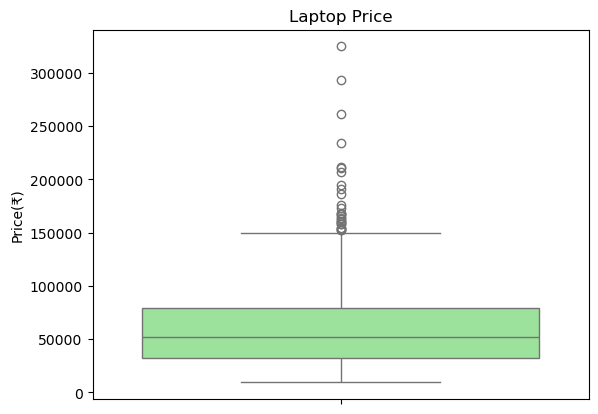

In [156]:
sns.boxplot(lap_data['Price(₹)'],color ='lightgreen')
plt.title("Laptop Price")
plt.show()

In [157]:
count_h = lap_data[lap_data['Price(₹)'] > 150000].shape[0]
print(f"Number of laptops priced above ₹150,000: {count_h}")
count_l = lap_data[lap_data['Price(₹)'] <150000].shape[0]
print(f"Number of laptops priced below ₹150,000: {count_l}")

Number of laptops priced above ₹150,000: 28
Number of laptops priced below ₹150,000: 1245


The boxplot shows that while most laptops fall within a typical price range, there are several high-priced outliers representing premium or gaming laptops.
These outliers are valid and important for analysis, as they reflect high-end models in the market.
Therefore, we’ll retain them to capture the full range of laptop pricing.

#    Checking Outliers for RAM

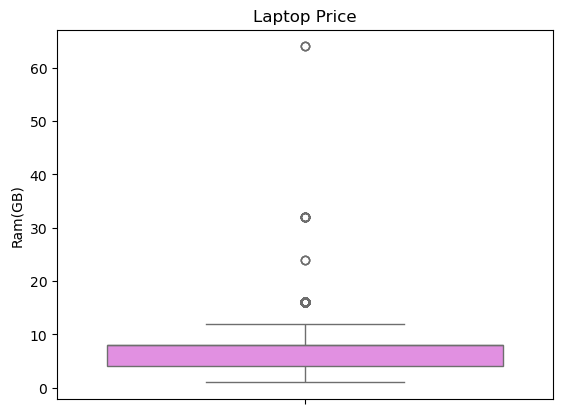

In [286]:
sns.boxplot(lap_data['Ram(GB)'],color ='violet')
plt.title("Laptop Price")
plt.show()

#    Checking Outliers for Inches

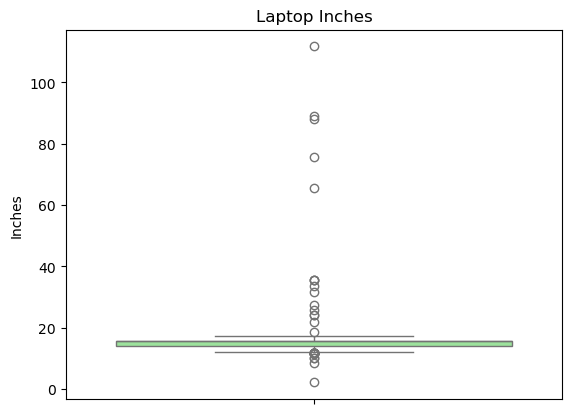

In [109]:

sns.boxplot(lap_data['Inches'],color ='lightgreen')
plt.title("Laptop Inches")
plt.show()

In [285]:
def removing_outliers(group):
    Q1 = group['Inches'].quantile(0.25)
    Q3 = group['Inches'].quantile(0.75)
    IQR = Q3 - Q1
    lower_B = Q1 - 1.5 * IQR
    upper_B = Q3 + 1.5 * IQR
    median_val = group['Inches'].median()
    print('Q1:', Q1)
    print('Q3:', Q3)
    print('IQR:', IQR)
    print('Lower Bound :',lower_B)
    print('Upper Bound :',upper_B)
    
    # Replace outliers with median
    group['Inches'] = np.where((group['Inches'] < lower_B) | (group['Inches'] > upper_B), median_val, group['Inches'])
        
    return group

lap_data = lap_data.groupby('TypeName', group_keys=False).apply(removing_outliers)


Q1: 13.3
Q3: 13.3
IQR: 0.0
Lower Bound : 13.3
Upper Bound : 13.3
Q1: 15.6
Q3: 17.3
IQR: 1.700000000000001
Lower Bound : 13.049999999999997
Upper Bound : 19.85
Q1: 11.6
Q3: 11.6
IQR: 0.0
Lower Bound : 11.6
Upper Bound : 11.6
Q1: 15.6
Q3: 15.6
IQR: 0.0
Lower Bound : 15.6
Upper Bound : 15.6
Q1: 13.3
Q3: 14.0
IQR: 0.6999999999999993
Lower Bound : 12.250000000000002
Upper Bound : 15.049999999999999
Q1: 15.6
Q3: 15.6
IQR: 0.0
Lower Bound : 15.6
Upper Bound : 15.6


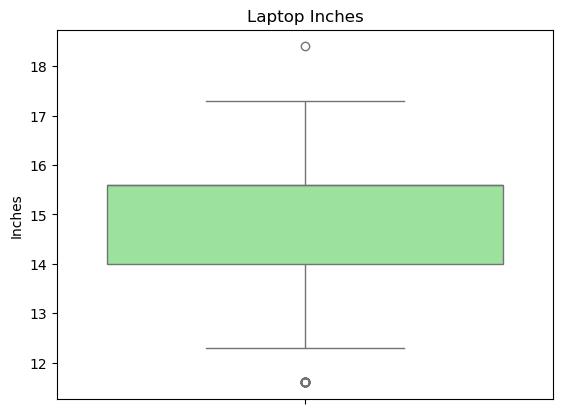

In [112]:

sns.boxplot(lap_data['Inches'],color ='lightgreen')
plt.title("Laptop Inches")
plt.show()

# Checking Outliers for Weight

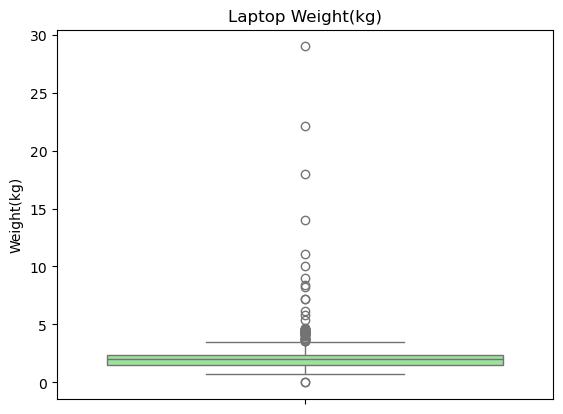

In [113]:

sns.boxplot(lap_data['Weight(kg)'],color ='lightgreen')
plt.title("Laptop Weight(kg)")
plt.show()

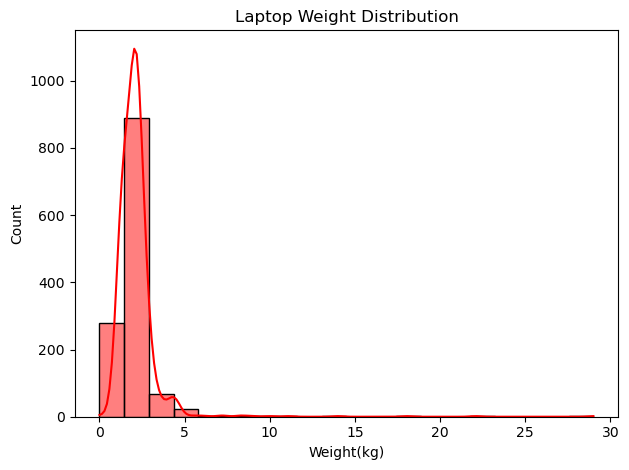

In [114]:
sns.histplot(lap_data['Weight(kg)'], bins=20, kde=True, color='Red')  # 20 bins = clean
plt.title('Laptop Weight Distribution')
plt.xlabel('Weight(kg)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: keep labels horizontal
plt.tight_layout()
plt.show()

In [117]:
def remove_outliers(group):
    Q1 = group['Weight(kg)'].quantile(0.25)
    Q3 = group['Weight(kg)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_B = Q1 - 1.5 * IQR
    upper_B = Q3 + 1.5 * IQR
    median_val = group['Weight(kg)'].median()
    
    # Replace outliers with median
    group['Weight(kg)'] = np.where((group['Weight(kg)'] < lower_B) | (group['Weight(kg)'] > upper_B), median_val, group['Weight(kg)'])
         
    return group

# Apply the function group-wise by TypeName
lap_data = lap_data.groupby('TypeName', group_keys=False).apply(remove_outliers)


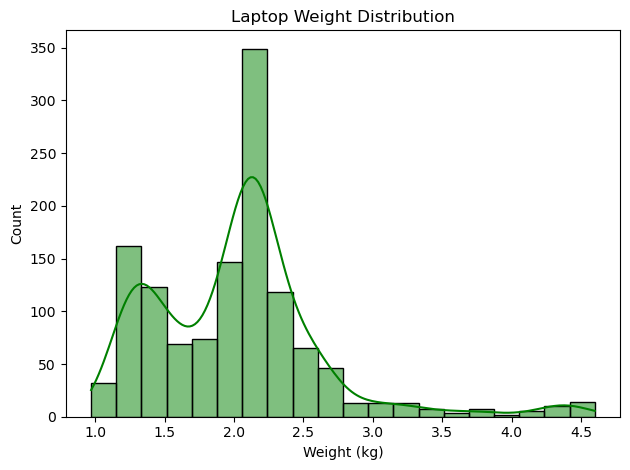

In [118]:
sns.histplot(lap_data['Weight(kg)'], bins=20, kde=True, color='green')  
plt.title('Laptop Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: keep labels horizontal
plt.tight_layout()
plt.show()

In [166]:

lap_data.to_csv("Laptop_Data.csv",index=False) #index=False)It prevents pandas from writing the row index as a separate column in your CSV file.
lap_data.to_excel("Laptop_Data.xlsx",index=False) #index=False)It prevents pandas from writing the row index as a separate column in your CSV file.

In [4]:
laptop_data= pd.read_csv("Laptop_Data.csv")

                                                     TESTING

In [258]:
from scipy.stats import ttest_ind


In [305]:
# Independent Sample T-test 

#Comparing the mean of 2 independent groups

gaming = laptop_data[laptop_data['TypeName'] == 'Gaming']['Price(₹)']
ultrabook = laptop_data[laptop_data['TypeName'] == 'Ultrabook']['Price(₹)']
t_stat,p_val = ttest_ind(gaming, ultrabook)

print(f"T-statistic: {t_stat}, \nP-value: {p_val}\n")

alpha = 0.05
if p_val  < alpha :
    print("Reject the Null Hypothesis")
    print("There is a significant difference in average price between Gaming laptops and Ultrabooks.")
    print( "Gaming laptops are significantly more expensive than Ultrabooks.")
else: 
    print(" Failed Reject the null hypothesis") 
  



T-statistic: 2.446848648600697, 
P-value: 0.014850568659517413

Reject the Null Hypothesis
There is no difference in average price between Gaming laptops and Ultrabooks.
Gaming laptops are significantly more expensive than Ultrabooks.


In [351]:
#from scipy.stats import f_oneway
import scipy.stats as stats
brands  = laptop_data['Company'].unique()
ram_groups =[laptop_data[laptop_data['Company'] ==  brand]['Ram(GB)'] for brand in  brands]

f_stat, p_val= stats.f_oneway(*ram_groups)

print(f"F-statistic: {f_stat}, \nP-value: {p_val}\n")

alpha = 0.05
if p_val  < alpha :
    print("Reject the Null Hypothesis")
    print("\nThere is a significant difference in average RAM across laptop brands.")
else: 
    print(" Failed Reject the null hypothesis") 
    print("There is no significant difference in average RAM among brands.")


F-statistic: 8.159073632453667, 
P-value: 7.132069529935268e-21

Reject the Null Hypothesis

There is a significant difference in average RAM across laptop brands.


In [350]:
#Chi-Squared test
contingency_tbl = pd.crosstab(laptop_data['TypeName'], laptop_data['OpSys'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_tbl)

#print("contingency_table", contingency_tbl)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
#print('expected frequencie',expected)
print()

alpha = 0.05
if p_val  < alpha :
    print("Reject the Null Hypothesis")
    print("There is a significant relationship between Laptop Type and Operating System.")
else: 
    print(" Failed Reject the null hypothesis") 
    print("Laptop Type and Operating System are independent (no relationship)")

Chi-square statistic: 409.8228295584756
p-value: 7.669900760937782e-63
Degrees of freedom: 40

Reject the Null Hypothesis
There is a significant relationship between Laptop Type and Operating System.


                                                    2.EXPLORATORY DATA ANALYSIS (EDA):

Univariate Analysis

In [4]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight(kg)        1273 non-null   float64
 10  Price(₹)          1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 109.5+ KB


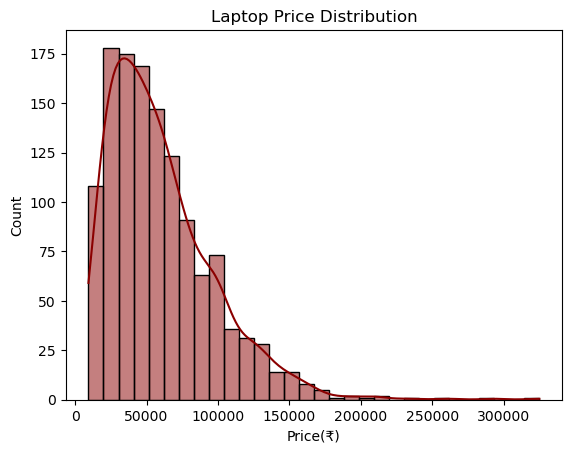

LAPTOP PRICE SUMMARY STATS
____________________________
count      1273.000000
mean      59955.814073
std       37332.251005
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79333.387200
max      324954.720000
Name: Price(₹), dtype: float64


In [218]:
sns.histplot(laptop_data['Price(₹)'],bins =30, kde =True, color ='darkred') 
plt.title("Laptop Price Distribution")
plt.show()
print("LAPTOP PRICE SUMMARY STATS")
print("____________________________")
print(laptop_data['Price(₹)'].describe())

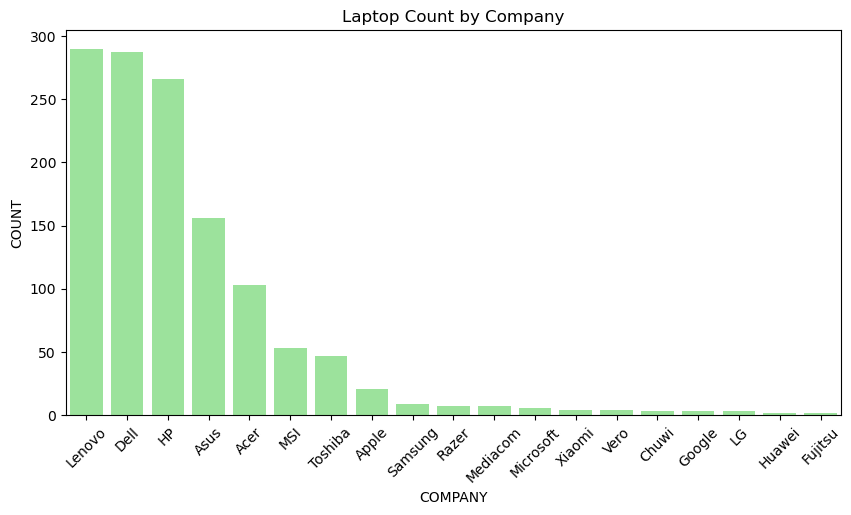

LAPTOP COMPANY SUMMARY STATS
____________________________
count       1273
unique        19
top       Lenovo
freq         290
Name: Company, dtype: object


In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Company', data=laptop_data, order=laptop_data['Company'].value_counts().index,color ="lightgreen")
plt.title('Laptop Count by Company')
plt.xticks(rotation=45) # to organize the company name in x
plt.xlabel("COMPANY")
plt.ylabel("COUNT")
plt.show()
print("LAPTOP COMPANY SUMMARY STATS")
print("____________________________")
print(laptop_data['Company'].describe())

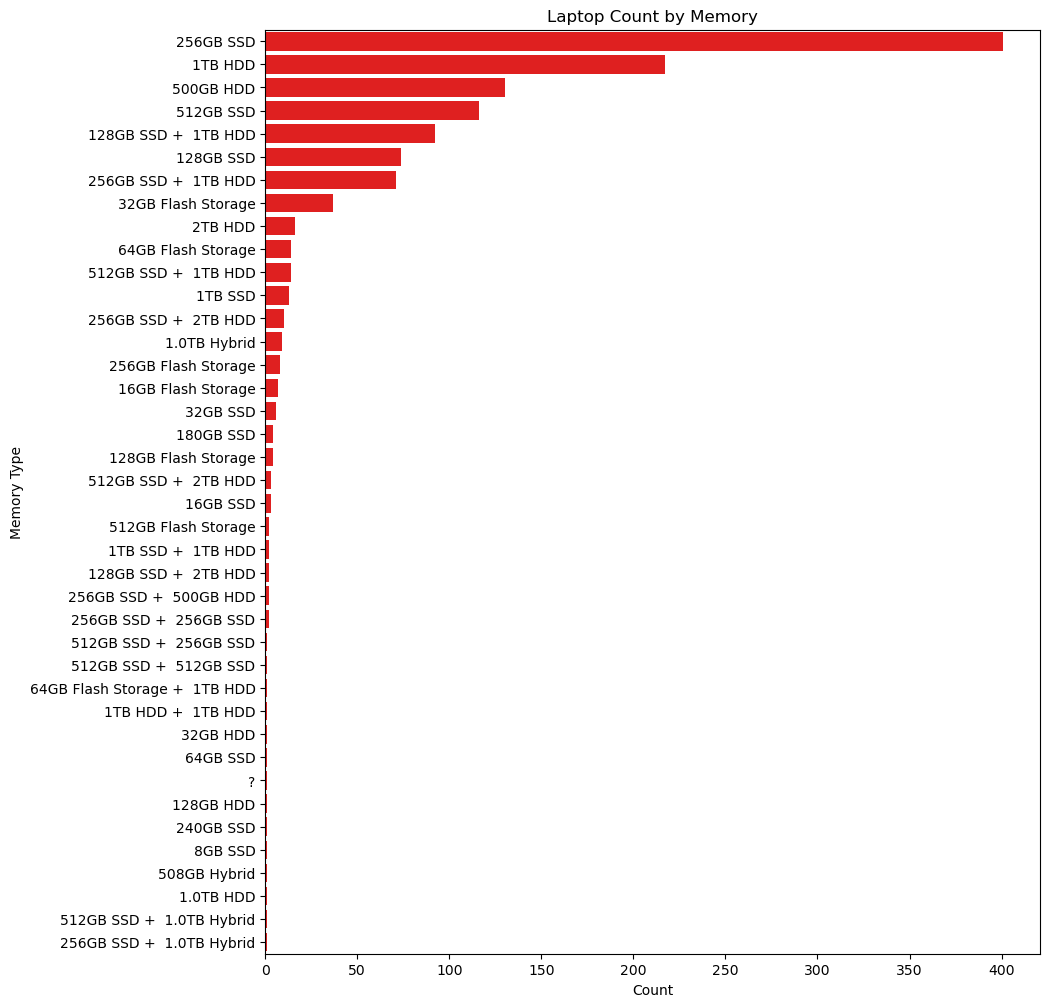

LAPTOP MEMORY SUMMARY STATS
____________________________
count          1273
unique           40
top       256GB SSD
freq            401
Name: Memory, dtype: object


In [254]:
plt.figure(figsize=(10, 12))
sns.countplot( y='Memory', data=laptop_data,  order=laptop_data['Memory'].value_counts().index,color ="red")
plt.title('Laptop Count by Memory')
plt.xlabel('Count')
plt.ylabel('Memory Type')
plt.show()
print("LAPTOP MEMORY SUMMARY STATS")
print("____________________________")
print(laptop_data['Memory'].describe())

                                                BIVARIATE ANALYSIS

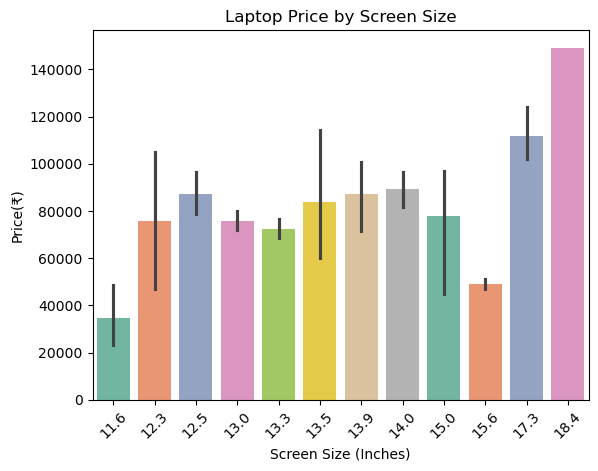

In [62]:
sns.barplot(data=laptop_data,x='Inches', y='Price(₹)',palette='Set2')

plt.title('Laptop Price by Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price(₹)')
plt.xticks(rotation=45)
plt.show()

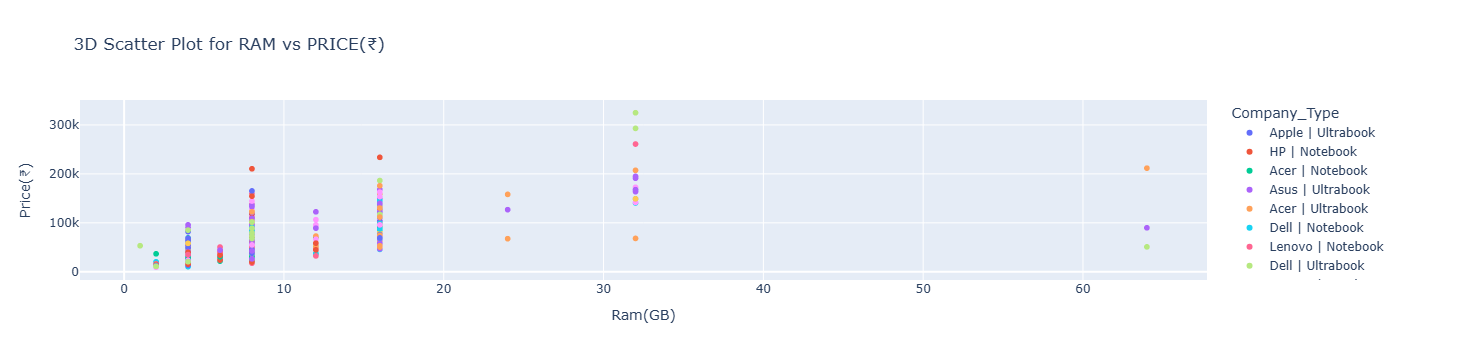

<Figure size 1000x1000 with 0 Axes>

In [292]:
#3D Scatter Plot for RAM vs PRICE(₹)
plt.figure(figsize=(10, 10))

laptop_data['Company_Type'] = laptop_data['Company'] + ' | ' + laptop_data['TypeName']
fig = px.scatter(laptop_data,x='Ram(GB)',y='Price(₹)',color="Company_Type", title="3D Scatter Plot for RAM vs PRICE(₹)")

fig.show()

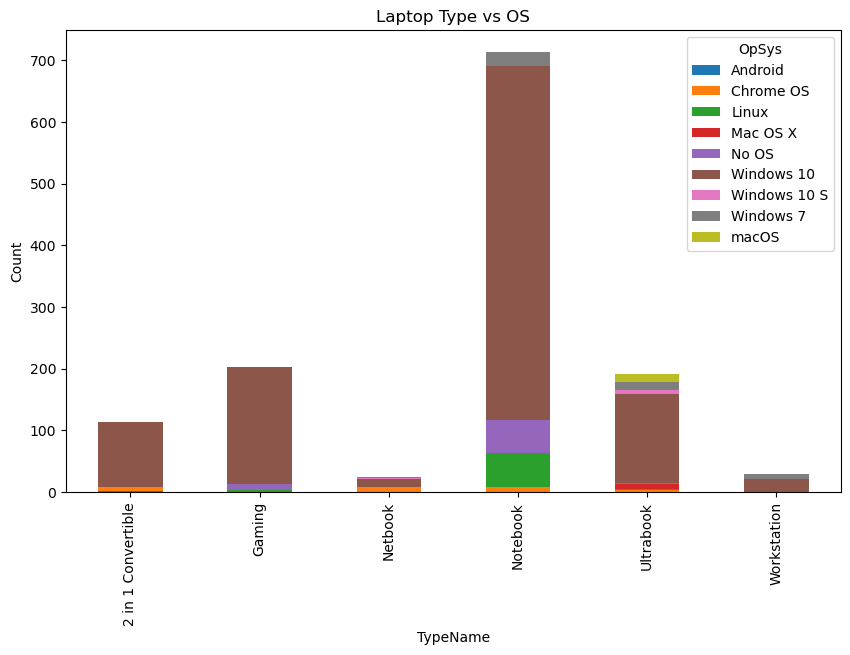

In [288]:
#Stacked Bar Chart
pd.crosstab(laptop_data['TypeName'], laptop_data['OpSys']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Laptop Type vs OS')
plt.ylabel('Count')
plt.show()

In [ ]:
#Here We can see most of the laptops uses WINDOWS OS

                MULTIVARIATE

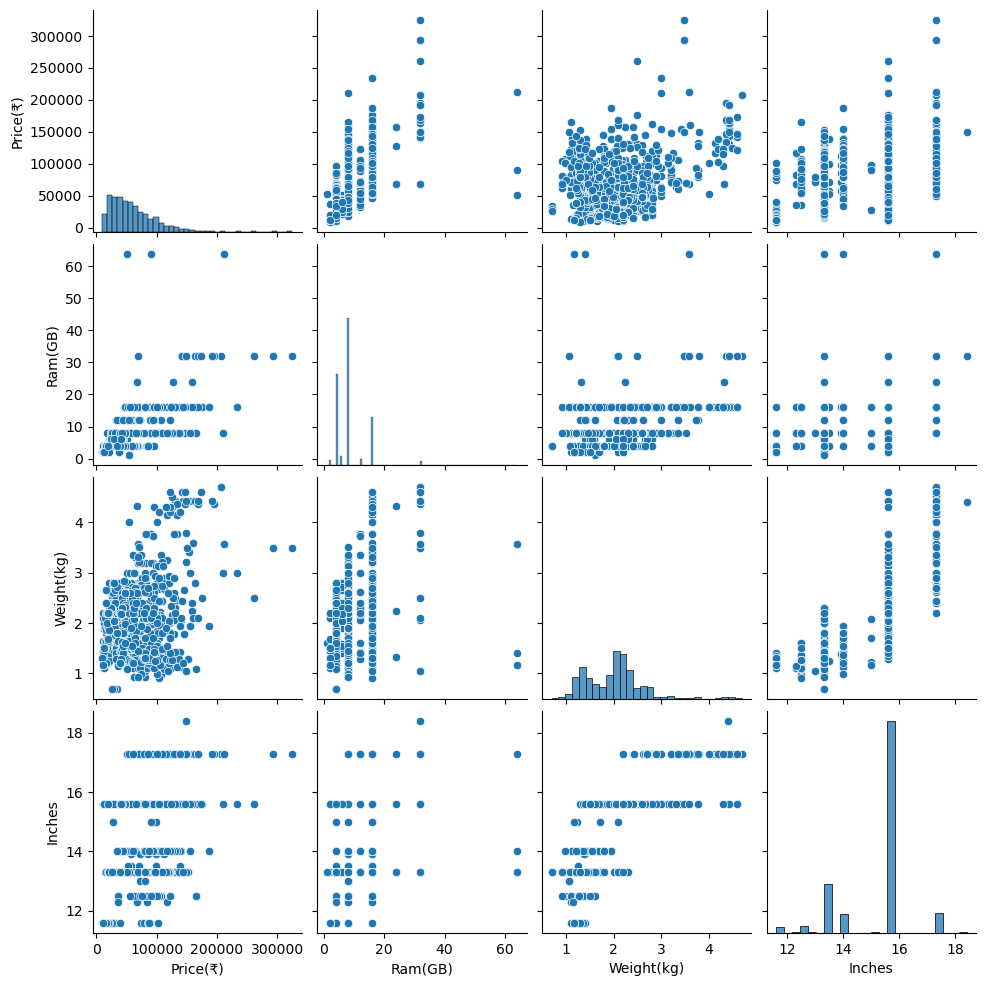

In [167]:
sns.pairplot(laptop_data[['Price(₹)', 'Ram(GB)', 'Weight(kg)', 'Inches']])
plt.show()


In [165]:
print(laptop_data.columns.tolist())

['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram(GB)', 'Memory', 'Gpu', 'OpSys', 'Weight(kg)', 'Price(₹)']


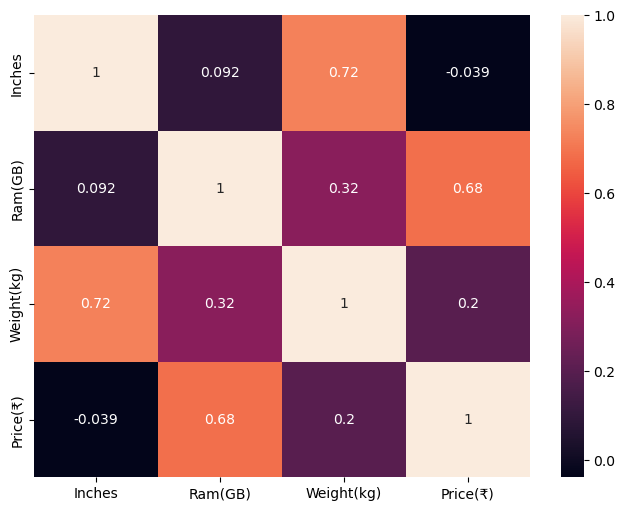

In [234]:
plt.figure(figsize=(8,6))
#ValueError: could not convert string to float: 'Apple'
numeric_data = laptop_data.select_dtypes(include='number') # Keeps only numeric columns 
sns.heatmap(numeric_data.corr(),annot=True  ) #annot=True -- corr label
plt.show()

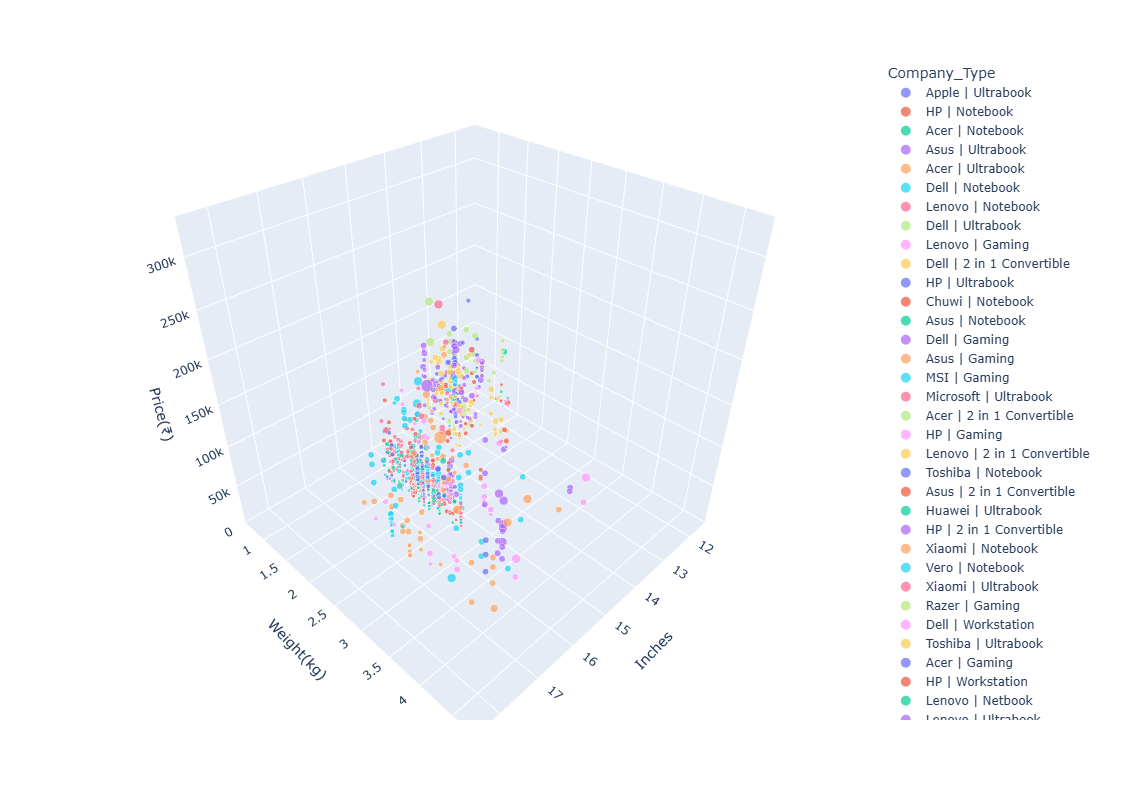

<Figure size 1000x1000 with 0 Axes>

In [225]:
import plotly.express as px

plt.figure(figsize=(10,10))
laptop_data['Company_Type'] = laptop_data['Company'] + ' | ' + laptop_data['TypeName']
fig = px.scatter_3d(laptop_data, x='Inches', y='Weight(kg)', z='Price(₹)',color='Company_Type', size='Ram(GB)', opacity=0.7)
fig.update_layout(
    width=1000,    # Width in pixels
    height=800     # Height in pixels
)

fig.show()

                            Feature Engineer

In [320]:
laptop_data['Touchscreen'] = laptop_data['ScreenResolution'].str.contains("Touchscreen", case=False).astype(int)


In [338]:
laptop_data[laptop_data['Touchscreen'] == 1]['TypeName'].unique()

array(['Ultrabook', '2 in 1 Convertible', 'Notebook', 'Gaming',
       'Workstation', 'Netbook'], dtype=object)

In [339]:
laptop_data[laptop_data['Touchscreen'] == 1]['TypeName'].value_counts()

TypeName
2 in 1 Convertible    112
Ultrabook              44
Notebook               20
Gaming                  5
Workstation             2
Netbook                 2
Name: count, dtype: int64

 #Insight for Touchscreen
Only a few laptops in the dataset have a touchscreen.
Laptops with touchscreens are usually more expensive.
These are mostly found in premium or special-use laptops like 2-in-1 or Ultrabooks.

In [327]:
# Finding Pixel Per Inch
x_res = laptop_data['ScreenResolution'].str.extract(r'(\d+)x')[0].astype(float)
y_res = laptop_data['ScreenResolution'].str.extract(r'x(\d+)')[0].astype(float)
laptop_data['PPI'] = ((x_res**2 + y_res**2)**0.5) / laptop_data['Inches']

In [335]:
laptop_data['PPI'].head()

0    226.983005
1    127.677940
2    141.211998
3    255.355880
4    226.983005
Name: PPI, dtype: float64

In [333]:
laptop_data.columns 

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram(GB)',
       'Memory', 'Gpu', 'OpSys', 'Weight(kg)', 'Price(₹)', 'Company_Type',
       'Touchscreen', 'PPI'],
      dtype='object')

In [ ]:
# VISUALIZATION

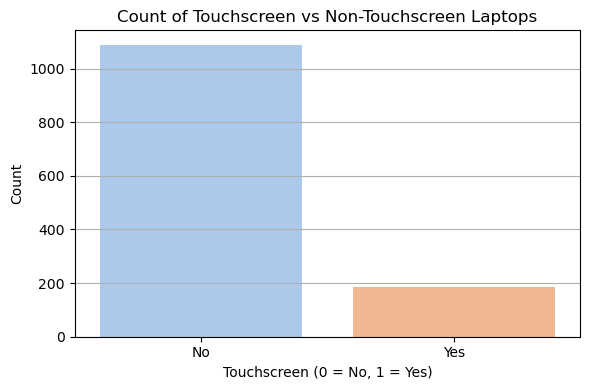

In [343]:
plt.figure(figsize=(6, 4))
sns.countplot(data=laptop_data, x='Touchscreen', palette='pastel')
plt.title('Count of Touchscreen vs Non-Touchscreen Laptops')
plt.xlabel('Touchscreen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.grid(axis='y')
plt.show()

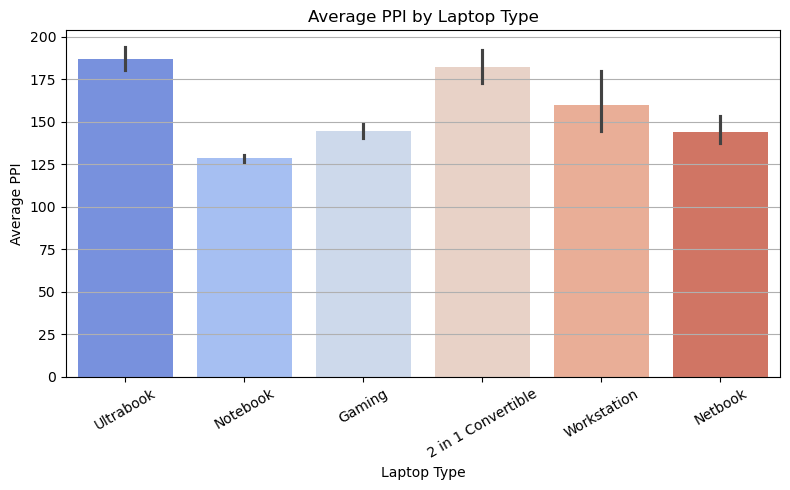

In [346]:
plt.figure(figsize=(8, 5))
sns.barplot(data=laptop_data, x='TypeName', y='PPI', estimator=np.mean, palette='coolwarm')
plt.title('Average PPI by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Average PPI')
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Insight for PPI
The chart shows that Ultrabooks and 2 in 1 Convertibles have the highest average PPI, meaning they offer the sharpest and clearest displays. 
These types are often premium models designed for better visual experience.
In contrast, Notebooks and some Gaming laptops have lower average PPI, suggesting that screen clarity may not be the main focus in those categories.